# Preprocess

## 1. Load data

In [1]:
%matplotlib widget
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

subjects = ['huhaoyi']
u = 0
cnt_file_dir = r"D:\eeg\cnts"

subj_name = subjects[u]
cnt_file_path = os.path.join(cnt_file_dir, subj_name+'.cnt')
print(subj_name)

EOG_channels = ['VEO', 'HEO']
ECG_channels = ['ECG']
unused_channels = ['M1', 'M2']
useless_channels = EOG_channels + ECG_channels + unused_channels

raw = mne.io.read_raw_cnt(cnt_file_path, eog=EOG_channels)
raw.info['bads'].extend(useless_channels)

useful_channels = raw.ch_names[:]
for ch in useless_channels:
    useful_channels.remove(ch)

print(useful_channels)

huhaoyi


<ipython-input-1-d42922e69cb4>:19: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(cnt_file_path, eog=EOG_channels)


In [2]:
# from collections import OrderedDict

# montage_fpath = r"D:\bcmi\EMBC\montages\Scan-SynAmps2-Quik-Cap64\SynAmps2 Quik-Cap64.DAT"

# with open(montage_fpath, 'r') as fid:
#     lines = fid.readlines()

# ch_names, poss = list(), list()
# nasion = lpa = rpa = None
# for i, line in enumerate(lines):
#     items = line.split()
#     pos = np.array([float(item) for item in items[1:]])
#     if items[0]=='Centroid' or items[0]=='EKG' or items[0]=='EMG' or items[0]=='REF.':
#         continue
#     elif items[0] == 'Nasion':
#         nasion = pos
#     elif items[0] == 'Left':
#         lpa = pos
#     elif items[0] == 'Right':
#         rpa = pos
#     else:
#         ch_names.append(items[0].upper())
#         poss.append(pos)

# electrodes = OrderedDict(zip(ch_names, poss))
# extended_1020_montage = mne.channels.make_dig_montage(electrodes, nasion, lpa, rpa)

extended_1020_montage = mne.channels.read_custom_montage(r"D:\bcmi\EMBC\montages\channel_62_pos.locs")

def toUpper(s):
    return s.upper()

extended_1020_montage.rename_channels(toUpper)

print(extended_1020_montage)
print(len(extended_1020_montage.ch_names))

<DigMontage | 0 extras (headshape), 0 HPIs, 0 fiducials, 62 channels>
62


Creating RawArray with float64 data, n_channels=62, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Creating RawArray with float64 data, n_channels=62, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

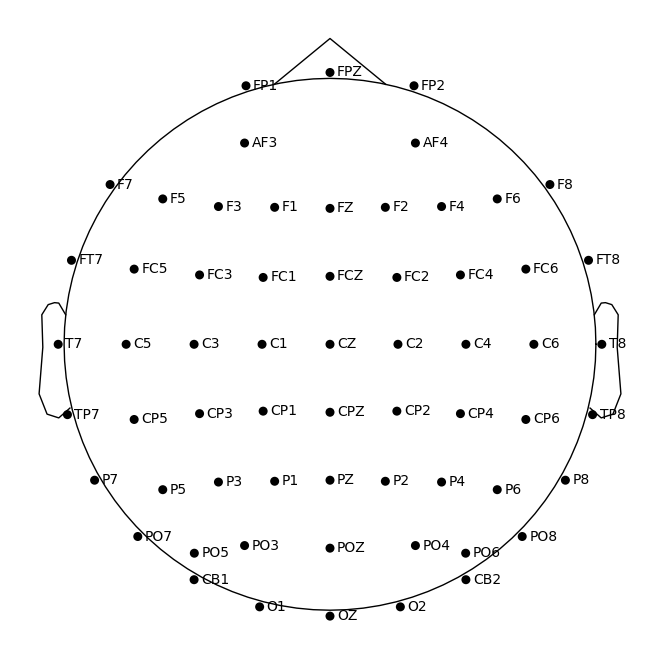

In [51]:
# visualize
fig_3d = extended_1020_montage.plot(kind='3d')
fig_3d.gca().view_init(azim=70, elev=15)
extended_1020_montage.plot(kind='topomap', show_names=True)

In [3]:
raw.set_montage(extended_1020_montage, match_case=True, on_missing='warn')

<ipython-input-3-d9ba50b4a679>:1: RuntimeWarning: DigMontage is only a subset of info. There are 3 channel positions not present in the DigMontage. The required channels are:

['M1', 'M2', 'ECG'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage(extended_1020_montage, match_case=True, on_missing='warn')


<RawCNT | huhaoyi.cnt, 67 x 4250960 (4251.0 s), ~92 kB, data not loaded>

In [ ]:
raw.info

In [ ]:
# M1, M2, VEO, HEO, ECG
raw.info['ch_names']

In [ ]:
len(raw.ch_names)

In [ ]:
# number of time points
raw.n_times

## 2. Filtering & Downsample
No occurence of AC power line interference.

In [4]:
raw.load_data()

# power line noise
raw = raw.notch_filter(freqs=[50, 100, 150, 200])
# Downsample the data and events at the same time
raw = raw.filter(l_freq=1, h_freq=75).resample(200)

Reading 0 ... 4250959  =      0.000 ...  4250.959 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 3301 samples (3.301 sec)



## 3. Mark bad channels

In [ ]:
raw.plot(duration=40, n_channels=67)

In [5]:
# raw.info['bads'] = EOG_channels + unused_channels
bad_channels = ['CB2']
raw.info['bads'].extend(bad_channels)
# the plot after bandpass is much better
# raw.plot(duration=40, n_channels=66)

In [ ]:
# bad channels are plot in red
raw.plot_sensors(ch_type='eeg', show_names=True)

## 4. Set average reference ???

In [ ]:
raw.set_eeg_reference(ref_channels='average')
fig2 = raw.plot(duration=40, n_channels=66)

## 5. Repair bad channels

Interpolating bad channels
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 61 sensor positions
Interpolating 1 sensors


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

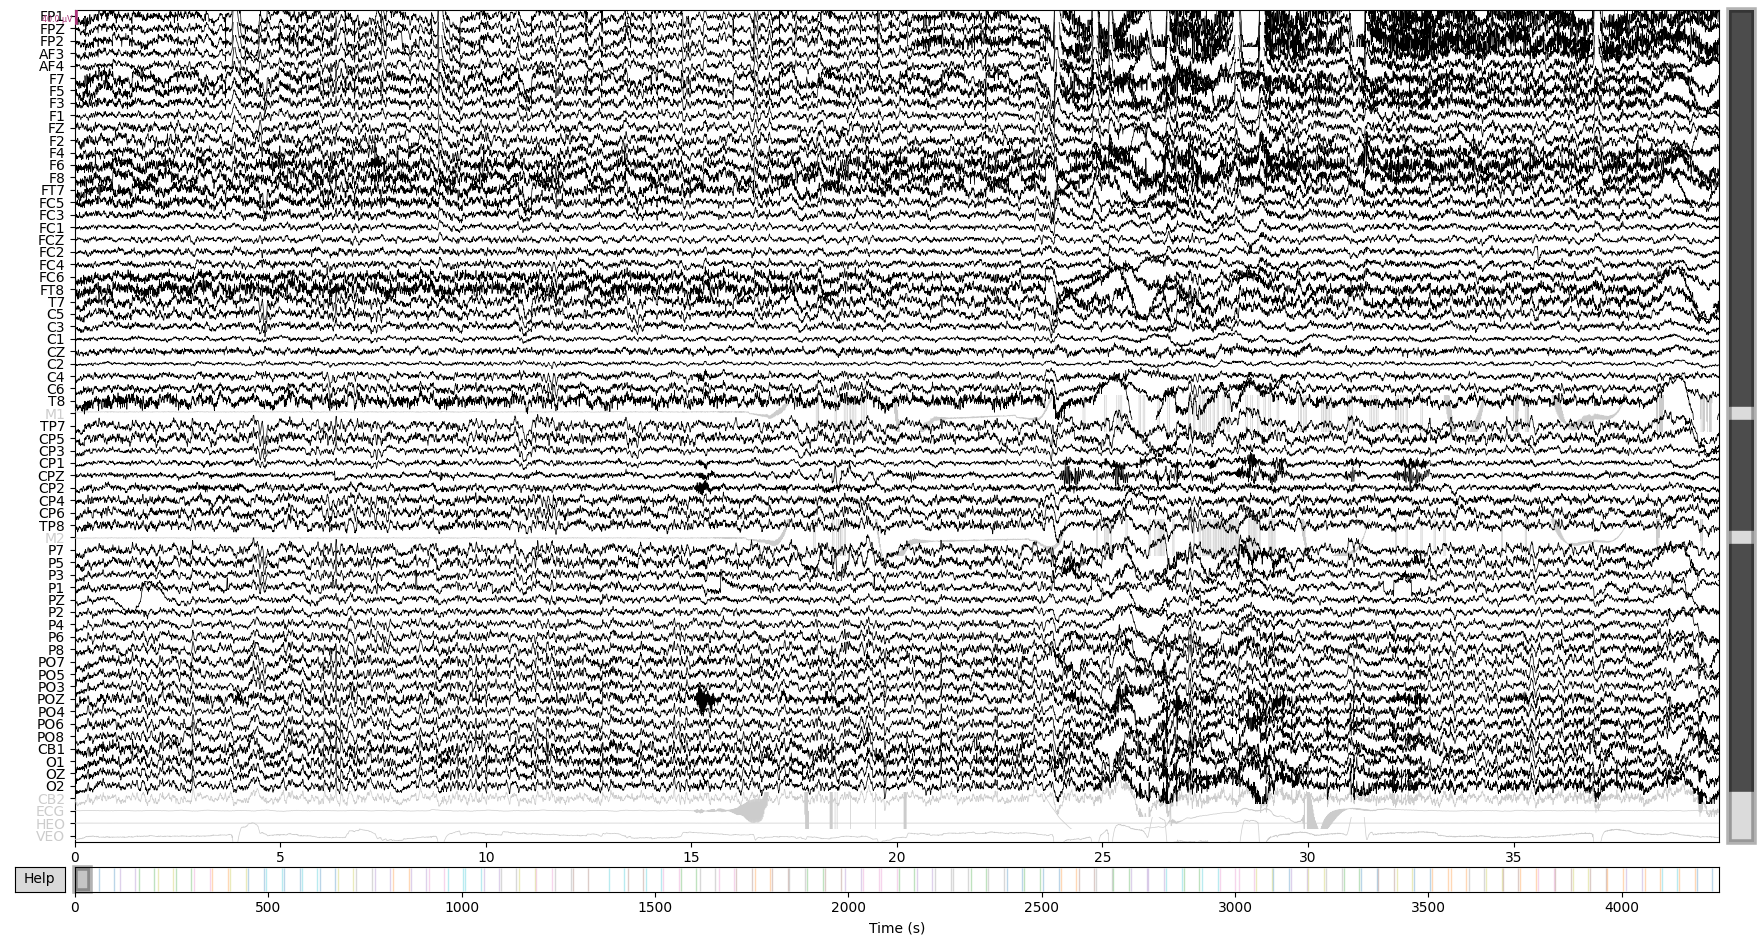

In [6]:
raw = raw.interpolate_bads(reset_bads=False, exclude=unused_channels+EOG_channels+ECG_channels)

raw.plot(duration=40, n_channels=67)

## 6. Remove artifacts with ICA
### 6.1 Visualize EOG artifact

In [ ]:
from mne.preprocessing import create_eog_epochs

eog_evoked = create_eog_epochs(raw, ch_name=EOG_channels).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

### 6.2 Visualize ECG artifact

In [ ]:
from mne.preprocessing import create_ecg_epochs

ecg_evoked = create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
ecg_evoked.plot_joint()

### 6.3 ICA
Decompose

Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 7.5s.
Creating RawArray with float64 data, n_channels=5, n_times=850192
    Range : 0 ... 850191 =      0.000 ...  4250.955 secs
Ready.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

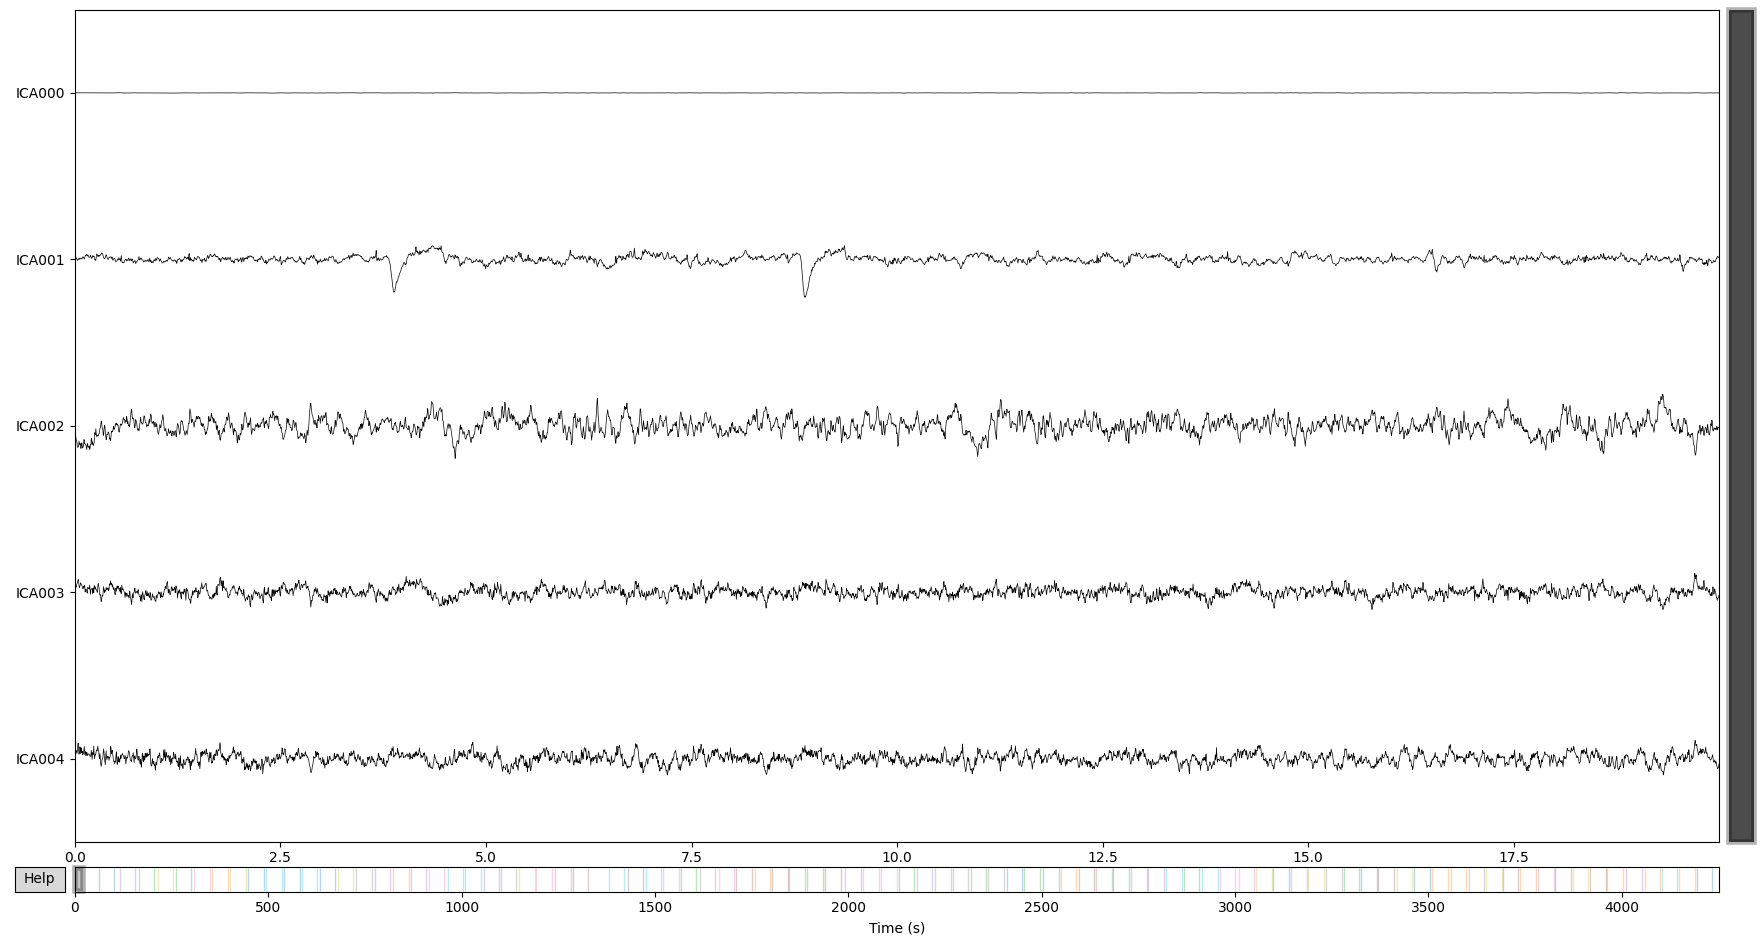

In [7]:
from mne.preprocessing import ICA

ica = ICA(n_components=5, max_iter='auto', random_state=97)
ica.fit(raw)

# plot the unfiltered raw file
ica.plot_sources(raw)

Exclude artifact components.

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

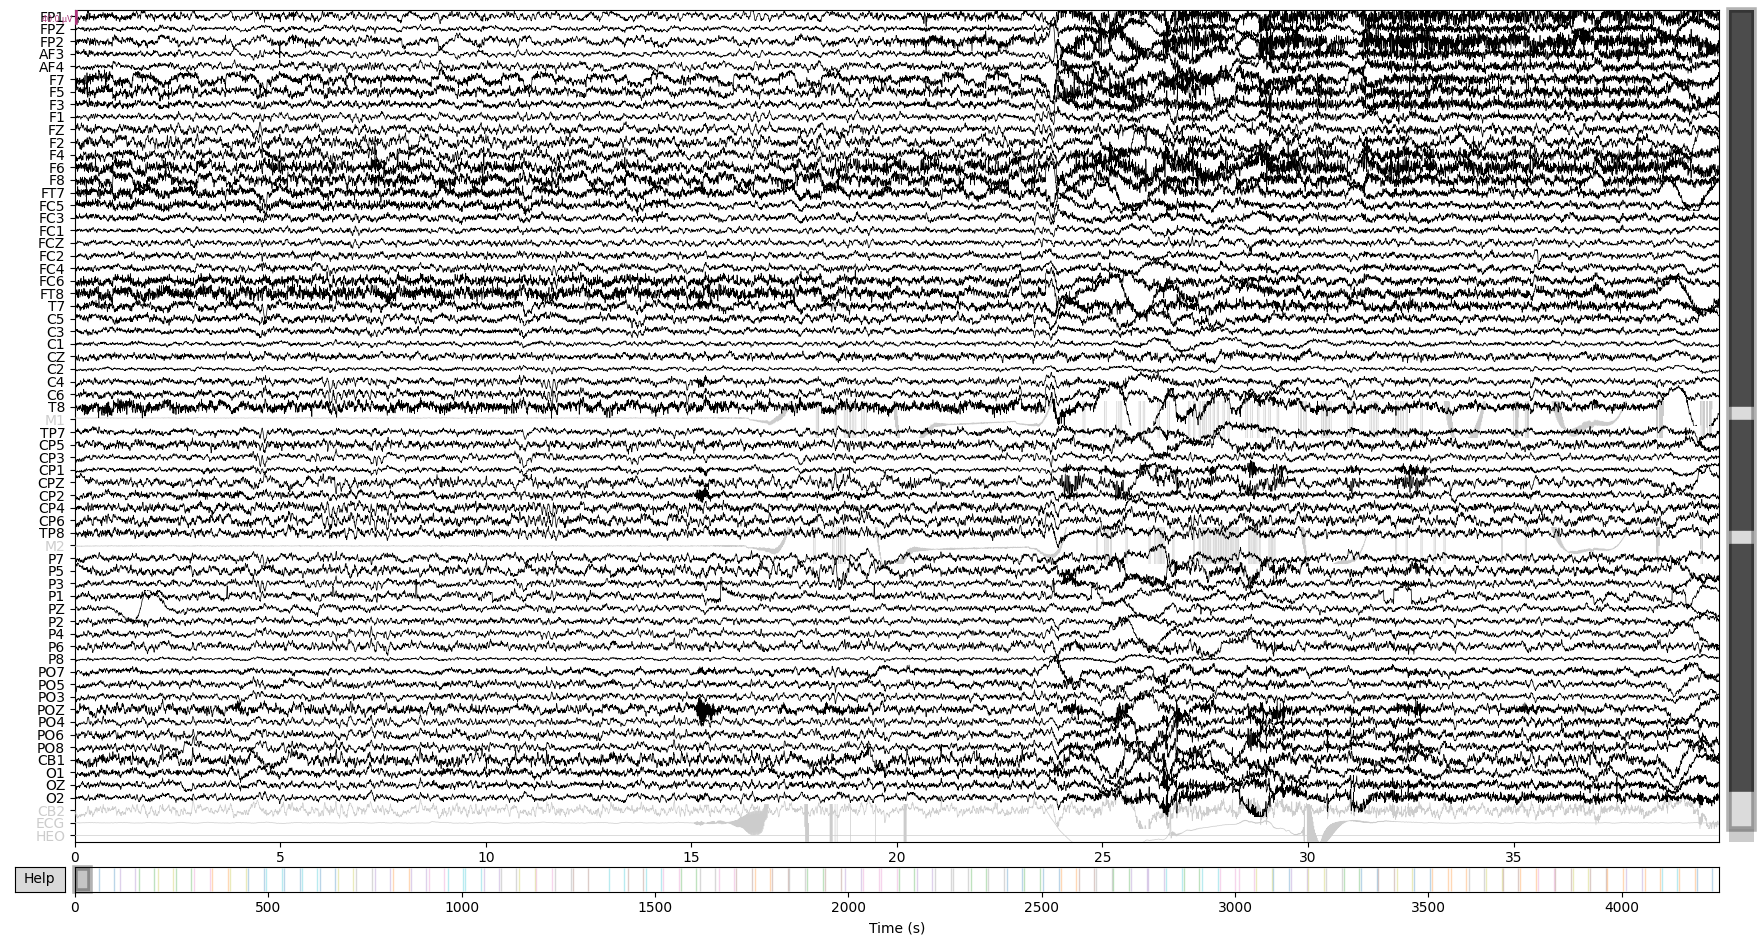

In [8]:
ica.exclude = [0, 1, 2]  # indices chosen based on plots above

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw.copy()
ica.apply(reconst_raw)

raw.plot(duration=40, n_channels=66)
reconst_raw.plot(duration=40, n_channels=66)

In [ ]:
raw.plot_sensors(show_names=True, ch_type='eeg')

In [9]:
del raw

In [ ]:
reconst_raw.plot_sensors(show_names=True, ch_type='eeg')

## 7. Extract trigger events && Epoching && Drop bad epochs

In [10]:
# process labels
# exclude images with low arousal rating
import csv


rating_file_dir = r"D:\eeg\ratings"
rating_file_path = os.path.join(rating_file_dir, subj_name, subj_name+'.csv')

labels = {}
all_images = set()
low_arousal_images = set()
with open(rating_file_path, 'r', newline='') as psyf:
    reader = csv.DictReader(psyf)
    for row in reader:
        img_no = int(row['image'])
        all_images.add(img_no)

        valence_rating = int(row['valence_rating'])
        arousal_rating = int(row['arousal_rating'])
        if arousal_rating < 3:
            low_arousal_images.add(img_no)

        if valence_rating < 0:
            # negative
            emotion_label = 0
        elif valence_rating == 0:
            # neutral
            emotion_label = 1
        elif valence_rating > 0:
            # positive
            emotion_label = 2
        else:
            print('error')
        
        labels[img_no] = emotion_label

high_arousal_images = all_images - low_arousal_images

print('Total: ', len(labels))
print(labels)
print('Low arousal images: ', len(low_arousal_images))
print(low_arousal_images)
print('High arousal images: ', len(high_arousal_images))
print(high_arousal_images)

Total:  89
{23: 2, 132: 1, 130: 2, 114: 2, 50: 2, 135: 0, 13: 0, 19: 0, 33: 0, 46: 0, 61: 2, 6: 1, 129: 0, 70: 1, 137: 0, 66: 0, 142: 0, 122: 0, 69: 0, 32: 0, 140: 2, 145: 2, 97: 1, 59: 1, 29: 2, 149: 2, 146: 2, 0: 2, 116: 2, 80: 2, 128: 2, 56: 2, 25: 2, 82: 2, 125: 2, 95: 0, 108: 2, 67: 1, 42: 2, 77: 1, 4: 0, 38: 0, 40: 0, 148: 0, 35: 0, 51: 0, 57: 0, 126: 0, 144: 0, 117: 2, 65: 2, 101: 1, 118: 2, 124: 0, 113: 2, 119: 2, 26: 2, 79: 1, 20: 2, 109: 0, 71: 0, 81: 0, 96: 0, 31: 0, 88: 0, 11: 2, 14: 1, 7: 2, 90: 1, 47: 2, 55: 2, 43: 1, 141: 2, 49: 2, 74: 2, 3: 1, 127: 1, 28: 1, 63: 0, 112: 2, 134: 2, 83: 2, 111: 2, 24: 2, 91: 0, 89: 0, 84: 0, 34: 0, 72: 0}
Low arousal images:  78
{0, 3, 4, 6, 7, 11, 14, 20, 23, 24, 25, 26, 28, 29, 31, 35, 38, 40, 42, 43, 46, 47, 49, 50, 55, 56, 59, 61, 63, 65, 66, 67, 69, 70, 71, 74, 77, 79, 80, 81, 82, 83, 84, 88, 89, 90, 91, 95, 96, 97, 101, 108, 109, 111, 112, 113, 114, 116, 117, 118, 119, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 137, 140, 141,

In [11]:
# all images
positive_count_all = 0
neutral_count_all = 0
negative_count_all = 0
for k, v in labels.items():
    if v == 0:
        negative_count_all += 1
    elif v == 1:
        neutral_count_all += 1
    else:
        positive_count_all += 1

print('All images, each category:')
print(negative_count_all, neutral_count_all, positive_count_all, sep=', ')

# High arousal images
positive_count_ha = 0
neutral_count_ha = 0
negative_count_ha = 0
for haimg in high_arousal_images:
    if labels[haimg] == 0:
        negative_count_ha += 1
    elif labels[haimg] == 1:
        neutral_count_ha += 1
    else:
        positive_count_ha += 1

print('High arousal images, each category:')
print(negative_count_ha, neutral_count_ha, positive_count_ha, sep=', ')

All images, each category:
35, 15, 39
High arousal images, each category:
11, 0, 0


In [12]:
events, event_id = mne.events_from_annotations(reconst_raw, event_id=int)

Used Annotations descriptions: ['101', '108', '109', '11', '111', '112', '113', '114', '116', '117', '118', '119', '122', '124', '125', '126', '127', '128', '129', '13', '130', '132', '134', '135', '137', '14', '140', '141', '142', '144', '145', '146', '148', '149', '19', '20', '23', '24', '25', '26', '28', '29', '3', '31', '32', '33', '34', '35', '38', '4', '40', '42', '43', '46', '47', '49', '50', '51', '55', '56', '57', '59', '6', '61', '63', '65', '66', '67', '69', '7', '70', '71', '72', '74', '77', '79', '80', '81', '82', '83', '84', '88', '89', '90', '91', '95', '96', '97']


In [ ]:
type(events), type(event_id)

In [ ]:
len(event_id)

In [ ]:
event_id['1'], type(event_id['1'])

In [ ]:
events.shape, events.shape[0]

In [ ]:
# (sample number, _, event code)
events[:10]

# 5s+30s+5s

In [13]:
import numpy as np

# only the start trigger is needed
choice = np.ones(events.shape[0])

for i in range(1, events.shape[0], 2):
    choice[i] = 0

choice = (choice == 1)
events = events[choice]

events.shape, events[:10]

((89, 3),
 array([[12381,     0,    23],
        [23151,     0,   132],
        [33088,     0,   130],
        [42896,     0,   114],
        [52214,     0,    50],
        [61832,     0,   135],
        [71054,     0,    13],
        [80292,     0,    19],
        [89696,     0,    33],
        [98934,     0,    46]]))

In [14]:
# event dictionary
event_dict = {}
for k, v in labels.items():
    if k == 0 or k == 149:
        continue
    
    if v == 0:
        event_dict['negative/'+str(k)] = k
    elif v == 1:
        event_dict['neutral/'+str(k)] = k
    if v == 2:
        event_dict['positive/'+str(k)] = k

print(len(event_dict))

reject_criteria = dict(eeg=100e-6)      # 100 µV
flat_criteria = dict(eeg=1e-6)          # 1 µV

epochs = mne.Epochs(reconst_raw, events, tmin=5, tmax=35, picks=useful_channels, event_id=event_dict, preload=True, baseline=None)

87
Not setting metadata
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Loading data for 87 events and 6001 original time points ...
0 bad epochs dropped


In [35]:
epochs.event_id

{'positive/23': 23,
 'neutral/132': 132,
 'positive/130': 130,
 'positive/114': 114,
 'positive/50': 50,
 'negative/135': 135,
 'negative/13': 13,
 'negative/19': 19,
 'negative/33': 33,
 'negative/46': 46,
 'positive/61': 61,
 'neutral/6': 6,
 'negative/129': 129,
 'neutral/70': 70,
 'negative/137': 137,
 'negative/66': 66,
 'negative/142': 142,
 'negative/122': 122,
 'negative/69': 69,
 'negative/32': 32,
 'positive/140': 140,
 'positive/145': 145,
 'neutral/97': 97,
 'neutral/59': 59,
 'positive/29': 29,
 'positive/146': 146,
 'positive/116': 116,
 'positive/80': 80,
 'positive/128': 128,
 'positive/56': 56,
 'positive/25': 25,
 'positive/82': 82,
 'positive/125': 125,
 'negative/95': 95,
 'positive/108': 108,
 'neutral/67': 67,
 'positive/42': 42,
 'neutral/77': 77,
 'negative/4': 4,
 'negative/38': 38,
 'negative/40': 40,
 'negative/148': 148,
 'negative/35': 35,
 'negative/51': 51,
 'negative/57': 57,
 'negative/126': 126,
 'negative/144': 144,
 'positive/117': 117,
 'positive/65

In [15]:
len(epochs['negative']), len(epochs['neutral']), len(epochs['positive'])

(35, 15, 37)

In [47]:
len(epochs.ch_names)

62

# Evoked

In [16]:
# epochs (n_epochs, n_channels, n_times)
# evoked (n_channels, n_times)

# exclude bad epochs ...todo

negative_evoked = epochs['negative'].average(picks=useful_channels)
neutral_evoked = epochs['neutral'].average(picks=useful_channels)
positive_evoked = epochs['positive'].average(picks=useful_channels)

In [48]:
len(negative_evoked.ch_names)

62

## 1. Wave amplitude

In [ ]:
# bad channels are repaired, do not exclude them
negative_evoked.plot(spatial_colors=True, exclude=[])
neutral_evoked.plot(spatial_colors=True, exclude=[])
positive_evoked.plot(spatial_colors=True, exclude=[])

In [ ]:
# average in [6, 8]
negative_evoked.plot_topomap(ch_type='eeg', times=7, average=2, exclude=[])
neutral_evoked.plot_topomap(ch_type='eeg', times=7, average=2, exclude=[])
positive_evoked.plot_topomap(ch_type='eeg', times=7, average=2, exclude=[])

No projector specified for this dataset. Please consider the method self.add_proj.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No projector specified for this dataset. Please consider the method self.add_proj.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No projector specified for this dataset. Please consider the method self.add_proj.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

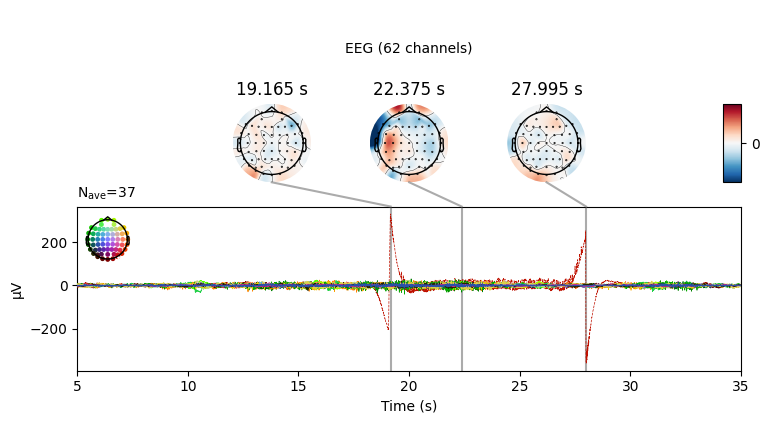

In [56]:
negative_evoked.plot_joint(exclude=[])
neutral_evoked.plot_joint(exclude=[])
positive_evoked.plot_joint(exclude=[])

In [ ]:
# compare the amplitude of 3 Evokeds
def custom_func(x):
    return x.max(axis=1)

# combine channels into 1
for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds([negative_evoked, neutral_evoked, positive_evoked], combine=combine)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

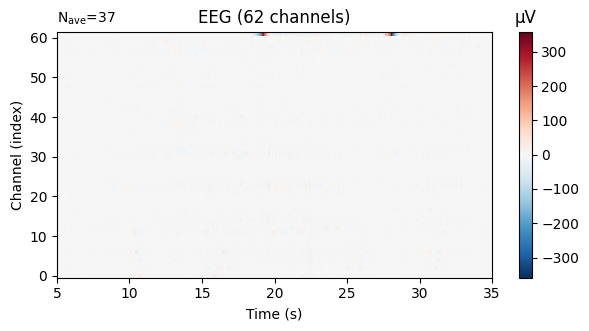

In [57]:
# one channel per row
negative_evoked.plot_image(exclude=[])
neutral_evoked.plot_image(exclude=[])
positive_evoked.plot_image(exclude=[])

## 2. Time-frequency analysis - Evoked

### 2.1 PSD

In [ ]:
# evoked (n_channels, n_times)
# psds (n_channels, n_freqs)
negative_psds, freqs = mne.time_frequency.psd_multitaper(negative_evoked, fmin=1, fmax=75)

### 2.2 Spectrogram

In [59]:
# 'fStart':[1, 4, 8, 14, 31], 'fEnd':[4, 8, 14, 31, 50]
# freqs = [1, 4, 8, 14, 31, 50]
# frequency resolution = step length
freqs = np.arange(5., 75., 3.)
# vmin, vmax = -3., 3.  # Define our color limits.

# The time-window length T = n_cycles / freq
# 1s
n_cycles = freqs
time_bandwidth = 4
negative_power = mne.time_frequency.tfr_multitaper(negative_evoked, freqs=freqs, n_cycles=n_cycles, time_bandwidth=time_bandwidth, return_itc=False, picks=useful_channels)
neutral_power = mne.time_frequency.tfr_multitaper(neutral_evoked, freqs=freqs, n_cycles=n_cycles, time_bandwidth=time_bandwidth, return_itc=False, picks=useful_channels)
positive_power = mne.time_frequency.tfr_multitaper(positive_evoked, freqs=freqs, n_cycles=n_cycles, time_bandwidth=time_bandwidth, return_itc=False, picks=useful_channels)

In [60]:
# (n_channels, n_freqs, n_times)
negative_power.data.shape

(62, 24, 6001)

In [46]:
# Plot results. No Baseline correction.
# average over 62 channels
negative_power.plot(baseline=None, combine='mean', title='Negative Evoked Spectrogram')
neutral_power.plot(baseline=None, combine='mean', title='Neutral Evoked Spectrogram')
positive_power.plot(baseline=None, combine='mean', title='Positive Evoked Spectrogram')

No baseline correction applied


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No baseline correction applied


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No baseline correction applied


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[<Figure size 640x480 with 2 Axes>]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No baseline correction applied
No baseline correction applied


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No baseline correction applied
No baseline correction applied


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No baseline correction applied
No baseline correction applied


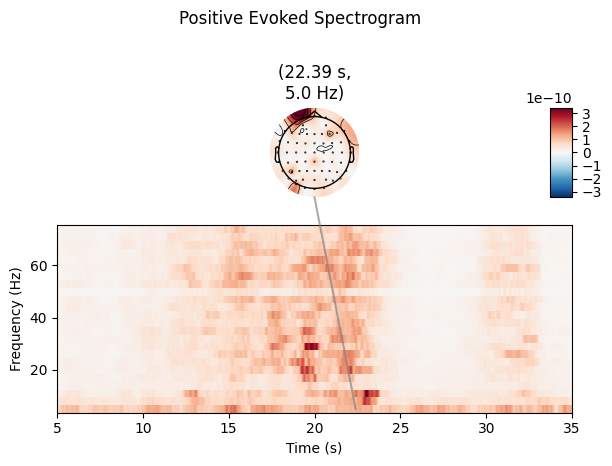

In [34]:
negative_power.plot_joint(baseline=None, combine='mean', title='Negative Evoked Spectrogram')
neutral_power.plot_joint(baseline=None, combine='mean', title='Neutral Evoked Spectrogram')
positive_power.plot_joint(baseline=None, combine='mean', title='Positive Evoked Spectrogram')

# Visualize epochs

## 1. Wave amplitude

In [ ]:
epochs.plot(n_epochs=10)

In [ ]:
epochs['negative'].plot_image(picks='eeg', combine='median')
epochs['neutral'].plot_image(picks='eeg', combine='median')
epochs['positive'].plot_image(picks='eeg', combine='median')

In [ ]:
opposite_channels = [['FP1', 'FP2'], ['AF3', 'AF4'], ['F5', 'F6'], ['FC5', 'FC6'], ['C5', 'C6'], ['CP5', 'CP6'], ['P5', 'P6'], ['PO5', 'PO6'], ['O1', 'O2']]

epochs['negative'].plot_image(picks=opposite_channels[6], combine='gfp')

## 2. PSD

In [ ]:
epochs['negative'][5].plot_psd(picks='eeg')

In [ ]:
epochs['neutral'][5].plot_psd(picks='eeg')

In [ ]:
epochs['positive'][5].plot_psd(picks='eeg')

In [ ]:
epochs['negative'].plot_psd_topomap()

In [ ]:
epochs['neutral'].plot_psd_topomap()

In [ ]:
epochs['positive'].plot_psd_topomap()

In [ ]:
plt.rcParams['figure.figsize'] = (16.6, 9.6)

In [ ]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches


def add_label_band(ax, top, bottom, label, *, spine_pos=-0.02, tip_pos=-0.01):
    """
    Helper function to add bracket around y-tick labels.

    Parameters
    ----------
    ax : matplotlib.Axes
        The axes to add the bracket to

    top, bottom : floats
        The positions in *data* space to bracket on the y-axis

    label : str
        The label to add to the bracket

    spine_pos, tip_pos : float, optional
        The position in *axes fraction* of the spine and tips of the bracket.
        These will typically be negative

    Returns
    -------
    bracket : matplotlib.patches.PathPatch
        The "bracket" Aritst.  Modify this Artist to change the color etc of
        the bracket from the defaults.

    txt : matplotlib.text.Text
        The label Artist.  Modify this to change the color etc of the label
        from the defaults.

    """
    # grab the yaxis blended transform
    transform = ax.get_yaxis_transform()

    # add the bracket
    bracket = mpatches.PathPatch(
        mpath.Path(
            [
                [tip_pos, top],
                [spine_pos, top],
                [spine_pos, bottom],
                [tip_pos, bottom],
            ]
        ),
        transform=transform,
        clip_on=False,
        facecolor="none",
        edgecolor="k",
        linewidth=2,
    )
    ax.add_artist(bracket)

    # add the label
    txt = ax.text(
        spine_pos,
        (top + bottom) / 2,
        label,
        ha="right",
        va="center",
        rotation="vertical",
        clip_on=False,
        transform=transform,
    )

    return bracket, txt

# figs = mne.viz.plot_epochs_image(epochs, picks=reconst_raw.ch_names, show=False, vmin=-100, vmax=100)
order, neg_o, neu_o, pos_o = [], [], [], []

for key, value in labels.items():
    if value == 0:
        neg_o.append(key-1)
    elif value == 1:
        neu_o.append(key-1)
    elif value == 2:
        pos_o.append(key-1)

order = neg_o + neu_o + pos_o

figs = mne.viz.plot_epochs_image(epochs, picks=useful_channels, group_by=None, combine=None, show=False, order=order, vmin=-100, vmax=100, evoked=False)

print(len(figs))

spectrogram_dir = './epochs_image/' + subj_name
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)

i = 1
for fig in figs:
    fig.axes[0].get_yaxis().set_ticks([])
    fig.axes[0].set_ylabel('Epochs', labelpad=34.0)
    add_label_band(fig.axes[0], 0, negative_count_all, 'Negative')
    add_label_band(fig.axes[0], negative_count_all, negative_count_all+neutral_count_all, 'Neutral')
    add_label_band(fig.axes[0], negative_count_all+neutral_count_all, negative_count_all+neutral_count_all+positive_count_all, 'Positive')
    fig.savefig(spectrogram_dir+'/{}.png'.format(i))
    i += 1
    plt.close(fig)

In [ ]:
from mne.time_frequency import tfr_multitaper, tfr_morlet


channel = 'T8'

freqs = np.arange(1., 50., 1.)
n_cycles = freqs
# N = n_cycles / freqs = 1s
# df = time_bandwidth / N = 2Hz
time_bandwidth = 4.0
negative_avg_tfr, negative_itc = tfr_multitaper(epochs['negative'], picks=[channel], freqs=freqs, n_cycles=n_cycles, time_bandwidth=time_bandwidth, average=True, n_jobs=4)
neutral_avg_tfr, neutral_itc = tfr_multitaper(epochs['neutral'], picks=[channel], freqs=freqs, n_cycles=n_cycles, time_bandwidth=time_bandwidth, average=True, n_jobs=4)
positive_avg_tfr, positive_itc = tfr_multitaper(epochs['positive'], picks=[channel], freqs=freqs, n_cycles=n_cycles, time_bandwidth=time_bandwidth, average=True, n_jobs=4)
# Inter-trial coherence (ITC)
# a measure of phase consistency over trials (typically within the range of zero to one)
# An ITC value close to 0 reflects high variability of phase angles across trials.

negative_avg_tfr.plot(baseline=None, title='negative '+channel)
neutral_avg_tfr.plot(baseline=None, title='neutral '+channel)
positive_avg_tfr.plot(baseline=None, title='positive '+channel)

In [ ]:
from mne.viz import plot_raw_psd

plot_raw_psd(reconst_raw, n_fft=512, estimate='power')

In [ ]:
# Evoked
## Negative Evoked
negative_evokeds = []
## Neutral Evoked
neutral_evokeds = []
## Positive Evoked
positive_evokeds = []


for n in range(1, 91):
    ev = epochs[str(n)].average()
    if labels[n] == 0:
        negative_evokeds.append(ev)
    elif labels[n] == 1:
        neutral_evokeds.append(ev)
    elif labels[n] == 2:
        positive_evokeds.append(ev)

negative_evoked = mne.combine_evoked(negative_evokeds, weights='equal')
neutral_evoked = mne.combine_evoked(neutral_evokeds, weights='equal')
positive_evoked = mne.combine_evoked(positive_evokeds, weights='equal')

print(negative_evoked)
print(neutral_evoked)
print(positive_evoked)

In [ ]:
negative_evoked.plot(spatial_colors=True, window_title='Negative Evoked')
neutral_evoked.plot(spatial_colors=True, window_title='Neutral Evoked')
positive_evoked.plot(spatial_colors=True, window_title='Positive Evoked')

In [ ]:
times = np.linspace(0.05, 20, 5)
negative_evoked.plot_topomap(times=times, colorbar=True)
neutral_evoked.plot_topomap(times=times, colorbar=True)
positive_evoked.plot_topomap(times=times, colorbar=True)

In [ ]:
negative_evoked.plot_joint()
neutral_evoked.plot_joint()
positive_evoked.plot_joint()

In [ ]:
def custom_func(x):
    return x.max(axis=1)


for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds([negative_evoked, neutral_evoked, positive_evoked], combine=combine)

In [ ]:
negative_evoked.plot_image()
neutral_evoked.plot_image()
positive_evoked.plot_image()

# Export npy

In [ ]:
epochs['1'].get_data().shape

In [39]:
# For this subject
# (number of images, 6(1 total+5 frequency bands), number of channels, sample numbers)
# (87, 6, 62, 6000) 30s/image, 200Hz

# further cut into 5 seconds (1000 sample points) slices
# (87, 6, 6, 62, 1000)

# final
# (bands, number of cases, channels, sample points)
# (6, 87*6, 62, 1000)

bands = ['all', 'delta', 'theta', 'alpha', 'beta', 'gamma']
lows = [1, 1, 4, 8, 14, 31]
highs = [50, 4, 8, 14, 31, 50]

imglist = list(epochs.event_id.values())

epochs.load_data()

# 6 * (1, 87*6, 62, 1000)
datas = []
for b in range(6):
    # 87 * (6, 62, 1000)
    for_this_band = []
    filtered_epochs = epochs.copy().filter(l_freq=lows[b], h_freq=highs[b])
    for img in imglist:
        # 6 * (1, 62, 1000)
        slices = []
        # (1, 62, 6000)
        img_data = filtered_epochs[str(img)].get_data()[:, :, :6000]
        for s in range(6):
            slices.append(img_data[:, :, 1000*s : 1000*(s+1)])
        
        for_this_band.append(np.concatenate(slices, axis=0))
    
    datas.append(np.expand_dims(np.concatenate(for_this_band, axis=0), axis=0))

subj_data = np.concatenate(datas, axis=0)

# 87*6
labs = []
for img in imglist:
    for s in range(6):
        labs.append(labels[img])

subj_label = np.array(labs)

print(subj_data.shape, subj_label.shape)
print(subj_data.dtype, subj_label.dtype)

out_dir = './data_embc'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

np.save(out_dir+'/{}_data.npy'.format(subj_name), subj_data)
np.save(out_dir+'/{}_label.npy'.format(subj_name), subj_label)


Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 661 samples (3.305 sec)

Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filt